# Exploratory

Here, we explore the clinical data from the EHR (electronic health records)

## Data Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../../data/raw/ResectMap_DATA_2023-11-13_2306.csv")
# Dataframe with basic information per patient
df_mrn = df[df["mrn"].notna()]
# Dataframe with Engel outcomes
df_engel = df[df["redcap_repeat_instrument"] == "engel_outcomes"]

# Cell to set the flag variable
execute_special_cell = False  # Set this to True to run the special cell

C:\Users\amaur\AppData\Local\Temp\ipykernel_27688\983094782.py:5: DtypeWarning: Columns (8,20,31,39,65,79,83,85,127,130,132,150,153,161,308,313,317,321,325,329,330,334,377,385,403,409,439,440,441,442,443,444,445,453,463,475,512,523,524,525,526,527,528,529,537,566,572,574,588,589,590,591,592,601,602,604,605,606,608,620,621,622,627,633,636,637,639,646,647,658,676,677,682,695,698,712,714,718,720,721,723,725,726,728,732,733,735,748,750,754,757,759,761,762,764,768,770,772,774,776,780,782,786,787,791,796,803,810,812,813,814,815,817,818,880,887,888,896,904,905,906,968,975,976,984,992,993,994,1056,1063,1064,1072,1080,1081,1082,1144,1151,1152,1169,1170,1232,1239,1240,1257,1258,1320,1327,1328,1345,1408,1415,1416,1432,1433,1496,1503,1521,1523,1540,1541,1558,1559,1576,1577,1595,1613,1631,1649,1667,1669,1670,1671,1678,1730,1738,1790,1801,1802,1811,1819,1820,1821,1822,1823,1830,1882,1890,1942,1953,1954,1963,1971,1972,1973,1974,1975,1982,2034,2042,2094,2105,2106,2115,2124,2125,2126,2127,2134,2186,219

In [2]:
# Print the number of participants
print("Number of participants in the main df:", df["record_id"].nunique())
print("Number of participants in the MRN df:", df_mrn["record_id"].nunique())
print("Same as number of row ?", df_mrn["record_id"].nunique()==len(df_mrn))
print("Number of participants in the Engel df:", df_engel["record_id"].nunique())
print("Same as number of row ?", df_engel["record_id"].nunique()==len(df_engel))

Number of participants in the main df: 677
Number of participants in the MRN df: 677
Same as number of row ? True
Number of participants in the Engel df: 677
Same as number of row ? False


This means that some of the participants have several Engel outcomes recorded in the EHR

## Distribution of age

In [3]:
print("Minimum age:", df_mrn["age"].min(), "\nMaximum age:", df_mrn["age"].max())

Minimum age: 2.0 
Maximum age: 84.0


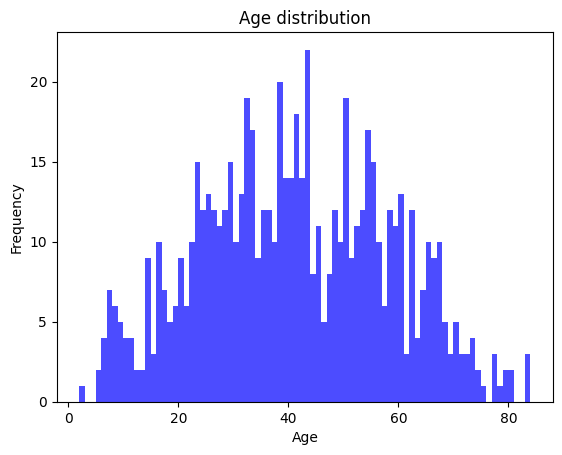

In [4]:
# Create a histogram
plt.hist(df_mrn["age"], bins=82, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')

# Show the plot
plt.show()

## Distribution of sex/gender

In [5]:
# Before, 1 represented female and 2 represented male
# Now, 0 represents female and 1 represents male
df_mrn.loc[:,"sex_gender"] = df_mrn["sex_gender"].map({1: 0, 2: 1})

# Define a mapping dictionary
gender_mapping = {0: 'female', 1: 'male'} 

# Count the number of males and females in the dataset
df_mrn["sex_gender"].replace(gender_mapping).value_counts()

sex_gender
female    345
male      332
Name: count, dtype: int64

In [6]:
# Print patients with multiple Engel outcomes
df_engel[df_engel['record_id'].duplicated()]

,record_id,redcap_repeat_instrument,redcap_repeat_instance,mrn,study_site,study_site_other,ny_num_yn,ny_num,other_study_ids,inc_crit,...,cshq_nw_z,cshq_para_raw,cshq_para_z,cshq_breath_raw,cshq_breath_z,cshq_ds_raw,cshq_ds_z,cshq_total_raw,cshq_total_z,neuropsychological_testing_complete
2043,RSCT041607,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2044,RSCT041607,engel_outcomes,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2814,RSCT058378,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3117,RSCT064938,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3259,RSCT066862,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4412,RSCT091205,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Distribution of Engel outcomes

In [7]:
# Remove rows where all values are 0
df_engel = df_engel[~(df_engel[['surg_engel___1', 'surg_engel___2', 'surg_engel___3', 'surg_engel___4']] == 0).all(axis=1)]

# Create 1 column out of the 4 dummy variables for engel outcome
df_engel['surg_engel'] = df_engel[['surg_engel___1', 'surg_engel___2', 'surg_engel___3', 'surg_engel___4']].idxmax(axis=1).str.split('___').str[1].astype(int)
df_engel[["record_id", "surg_engel", 'surg_engel___1', 'surg_engel___2', 'surg_engel___3', 'surg_engel___4']].head()

,record_id,surg_engel,surg_engel___1,surg_engel___2,surg_engel___3,surg_engel___4
9,RSCT000111,2,0.0,1.0,0.0,0.0
26,RSCT000208,3,0.0,0.0,1.0,0.0
35,RSCT000277,4,0.0,0.0,0.0,1.0
40,RSCT000508,1,1.0,0.0,0.0,0.0
48,RSCT000749,2,0.0,1.0,0.0,0.0


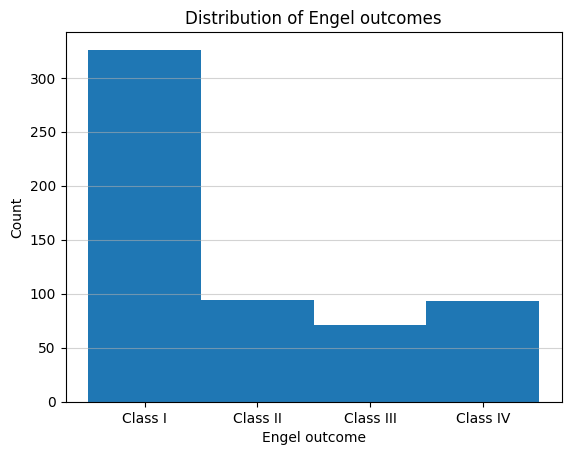

In [8]:
# Create a histogram of the 'surg_engel' variable
plt.hist(df_engel['surg_engel'], bins=[1, 2, 3, 4, 5])  # Specify the bin edges

# Customize x-axis ticks and labels
bin_centers = [1.5, 2.5, 3.5, 4.5]
plt.xticks(bin_centers, ['Class I', 'Class II', 'Class III', 'Class IV'])

# Add labels and title
plt.xlabel('Engel outcome')
plt.ylabel('Count')
plt.title('Distribution of Engel outcomes')

# Add grid for better readability
plt.grid(axis='y', alpha=0.55)

# Show the plot
plt.show()

### Distribution of Engel classes

Class I

    IA: Completely seizure-free since surgery
    IB: Non disabling simple partial seizures only since surgery
    IC: Some disabling seizures after surgery, but free of disabling seizures for at least 2 years
    ID: Generalized convulsions with antiepileptic drug withdrawal only

Class II
    
    IIA: Initially free of disabling seizures but has rare seizures now
    IIB: Rare disabling seizures since surgery
    IIC: More than rare disabling seizures after surgery, but rare seizures for at least 2 years
    IID: Nocturnal seizures only

Class III

    IIIA: Worthwhile seizure reduction
    IIIB: Prolonged seizure-free intervals amounting to greater than half the follow-up period, but not less than 2 years

Class IV

    IVA: Significant seizure reduction
    IVB: No appreciable change
    IVC: Seizures worse

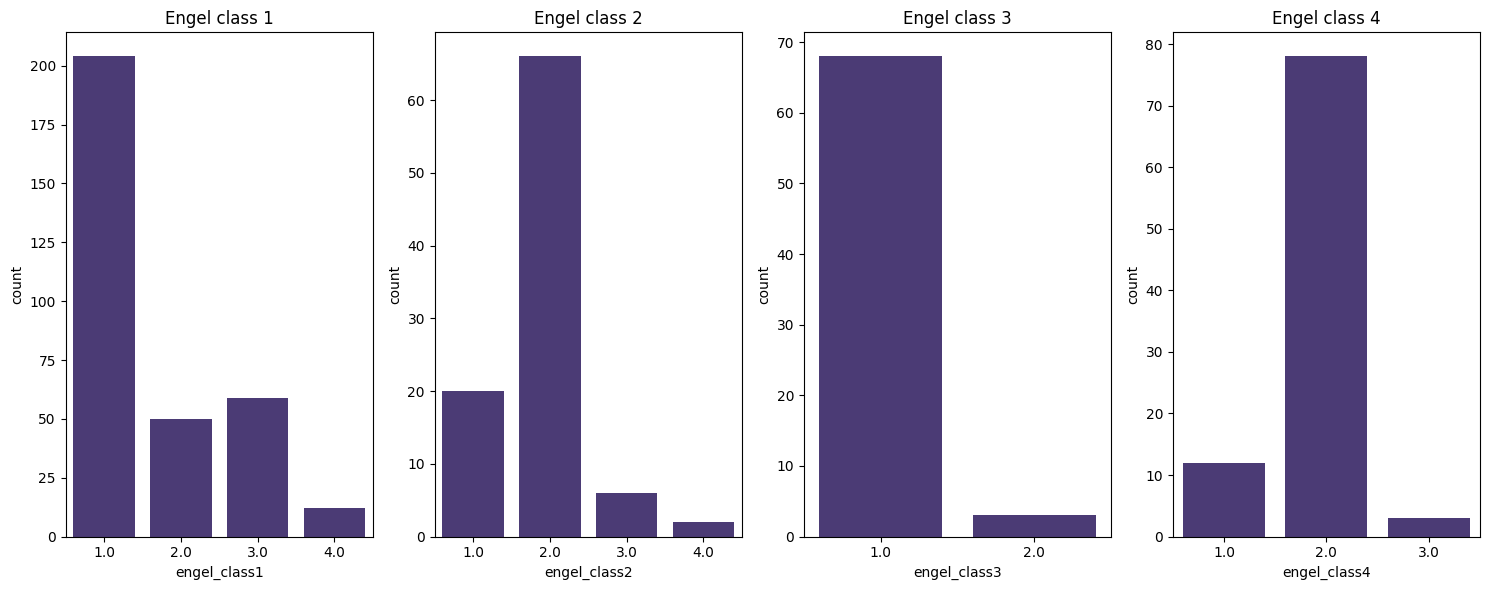

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn palette globally
sns.set_palette('viridis')

# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# Plot the distribution for engel_class1
plt.subplot(1, 4, 1)
sns.countplot(x='engel_class1', data=df_engel)
plt.title('Engel class 1')

# Plot the distribution for engel_class2
plt.subplot(1, 4, 2)
sns.countplot(x='engel_class2', data=df_engel)
plt.title('Engel class 2')

# Plot the distribution for engel_class3
plt.subplot(1, 4, 3)
sns.countplot(x='engel_class3', data=df_engel)
plt.title('Engel class 3')

# Plot the distribution for engel_class4
plt.subplot(1, 4, 4)
sns.countplot(x='engel_class4', data=df_engel)
plt.title('Engel class 4')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Distribution of Race

In [10]:
# Check for rows where all values are 0
print("Number of rows with all 0 values:" ,(df_mrn.loc[:, ['race___1', 'race___2', 'race___3', 'race___4', 'race___5', 'race___6', 'race___7']] == 0).all(axis=1).sum())

# Create 1 column out of the 7 dummy variables for race
df_mrn.loc[:, 'race'] = df_mrn.loc[:, ['race___1', 'race___2', 'race___3', 'race___4', 'race___5', 'race___6', 'race___7']].idxmax(axis=1).str.split('___').str[1].astype(int)

# Check that it worked
df_mrn[["record_id", "race", 'race___1', 'race___2', 'race___3', 'race___4', 'race___5', 'race___6', 'race___7']].head()

Number of rows with all 0 values: 0


C:\Users\amaur\AppData\Local\Temp\ipykernel_27688\3396647371.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mrn.loc[:, 'race'] = df_mrn.loc[:, ['race___1', 'race___2', 'race___3', 'race___4', 'race___5', 'race___6', 'race___7']].idxmax(axis=1).str.split('___').str[1].astype(int)


,record_id,race,race___1,race___2,race___3,race___4,race___5,race___6,race___7
0,RSCT000111,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12,RSCT000208,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31,RSCT000277,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
38,RSCT000508,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42,RSCT000749,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
# Define a mapping dictionary
race_mapping = {1: 'African-American/Black', 2: 'Asian', 3: 'Caucasian/White', 4: 'Native American.Alaska Native', 5: 'Native Hawaiian/Other Pacific Islander', 6: 'Other', 7: 'Unknown/Not-Reported'}

# Count the number of males and females in the dataset
df_mrn["race"].replace(race_mapping).value_counts()

race
Caucasian/White                           460
Other                                      80
African-American/Black                     55
Unknown/Not-Reported                       51
Asian                                      29
Native Hawaiian/Other Pacific Islander      2
Name: count, dtype: int64

## Tables of Na percentage per column

### df_mrn

No data in df_mrn from column 380 and on

In [12]:
# Calculate the percentage of NaN values per column
na_percentage = (df_mrn.iloc[:,:380].isna().mean() * 100).round(2)

# Create a new DataFrame with the results
na_df_mrn = pd.DataFrame({'Column': na_percentage.index, 'Percentage of NaN': na_percentage.values})

# Display the resulting DataFrame
print(na_df_mrn)

                        Column  Percentage of NaN
0                    record_id               0.00
1     redcap_repeat_instrument             100.00
2       redcap_repeat_instance             100.00
3                          mrn               0.00
4                   study_site               0.00
..                         ...                ...
375        prev_aeds_name___38               0.00
376        prev_aeds_name___39               0.00
377            aeds_prev_other              84.49
378                  aed_notes              28.21
379  epilepsy_history_complete               0.00

[380 rows x 2 columns]


### df_engel

No data in df_engel before column 3451 and after 3466

In [13]:
# Calculate the percentage of NaN values per column
na_percentage = (df_engel.isna().mean() * 100).round(2)

# Create a new DataFrame with the results
na_df_engel = pd.DataFrame({'Column': na_percentage.index, 'Percentage of NaN': na_percentage.values})

# Create a new DataFrame with the columns that are completely empty
empty_df_engel = na_df_engel[na_df_engel["Percentage of NaN"]==100]

# Remove columns with only NAs
df_engel_drop = df_engel.drop(columns=empty_df_engel["Column"])

# Display the resulting DataFrame
print(na_df_engel[na_df_engel["Percentage of NaN"]!=100])

                        Column  Percentage of NaN
0                    record_id               0.00
1     redcap_repeat_instrument               0.00
2       redcap_repeat_instance               0.00
3451               eo_reviewer               0.86
3452              eo_date_surg               1.71
3453              eo_date_clin               0.51
3454              eo_type_clin               3.60
3455           eo_yrs_postsurg               1.88
3456            surg_engel___1               0.00
3457            surg_engel___2               0.00
3458            surg_engel___3               0.00
3459            surg_engel___4               0.00
3460              engel_class1              44.35
3461              engel_class2              83.90
3462              engel_class3              87.84
3463              engel_class4              84.08
3464               eo_comments              32.19
3465   engel_outcomes_complete               0.00
4677                surg_engel               0.00


### df

No data in the df in 72 columns 

In [14]:
# Calculate the percentage of NaN values per column
na_percentage = (df.isna().mean() * 100).round(2)

# Create a new DataFrame with the results
na_df = pd.DataFrame({'Column': na_percentage.index, 'Percentage of NaN': na_percentage.values})

# Create a new DataFrame with the columns that are completely empty
empty_df = na_df[na_df["Percentage of NaN"]==100]

# Remove columns with only NAs
df_drop = df.drop(columns=empty_df["Column"])

There appears to be 2 instance where the column "engel_outcomes_complete" has the value 0 instead of 2 which matches with a patient with 3 engel outcomes

In [15]:
df_engel["engel_outcomes_complete"].unique()
df_engel[df_engel["engel_outcomes_complete"]==0]

,record_id,redcap_repeat_instrument,redcap_repeat_instance,mrn,study_site,study_site_other,ny_num_yn,ny_num,other_study_ids,inc_crit,...,cshq_para_raw,cshq_para_z,cshq_breath_raw,cshq_breath_z,cshq_ds_raw,cshq_ds_z,cshq_total_raw,cshq_total_z,neuropsychological_testing_complete,surg_engel
2042,RSCT041607,engel_outcomes,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2043,RSCT041607,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


Check the data types of the different columns

In [16]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4822 entries, 0 to 4821
Data columns (total 4677 columns):
 #     Column                               Dtype  
---    ------                               -----  
 0     record_id                            object 
 1     redcap_repeat_instrument             object 
 2     redcap_repeat_instance               float64
 3     mrn                                  float64
 4     study_site                           float64
 5     study_site_other                     float64
 6     ny_num_yn                            float64
 7     ny_num                               object 
 8     other_study_ids                      object 
 9     inc_crit                             float64
 10    dem_yob                              float64
 11    age                                  float64
 12    sex_gender                           float64
 13    race___1                             float64
 14    race___2                             float64
 15    

In [17]:
if execute_special_cell:

    test = df_drop[df_drop["redcap_repeat_instance"]==1]

    # Group by 'record_id' and aggregate non-null values for each column
    consolidated_df = df.groupby('record_id').agg(lambda x: x.dropna().iloc[0] if not x.dropna().empty else None)

    # Reset the index to get a clean DataFrame
    consolidated_df = consolidated_df.reset_index()

    # Now, consolidated_df contains one row per patient with non-null information
    print(consolidated_df)

    # Save dataframe for further use
    consolidated_df.to_csv("../../data/processed/consolidated_df.csv")

In [18]:
if execute_special_cell:

    # Calculate the percentage of NaN values per column
    na_percentage = (consolidated_df.isna().mean() * 100).round(2)

    # Create a new DataFrame with the results
    na_consolidated_df = pd.DataFrame({'Column': na_percentage.index, 'Percentage of NaN': na_percentage.values})

    # Display the resulting DataFrame
    print(na_consolidated_df[na_consolidated_df["Percentage of NaN"]==100])
else:
    consolidated_df = pd.read_csv("../../data/processed/consolidated_df.csv")

    print(consolidated_df.isna().sum().sort_values())

Unnamed: 0                     0
resect_les_hypoth___2          0
resect_les_hypoth___3          0
resect_les_thal___1            0
resect_les_thal___2            0
                            ... 
resect_pneu_yn               677
seizures_type_pdis_other7    677
eeg_intict_other_period6     677
eeg_intict_other_circ6       677
resect_hern_yn               677
Length: 4678, dtype: int64


C:\Users\amaur\AppData\Local\Temp\ipykernel_27688\409264335.py:12: DtypeWarning: Columns (84,86,128,133,151,314,318,322,326,330,335,410,464,476,513,524,525,526,527,528,529,530,567,573,589,603,605,606,607,609,621,622,623,628,634,637,638,640,647,696,713,715,719,721,722,724,726,727,729,733,734,736,749,751,755,758,760,762,763,765,775,792,797,811,813,814,815,816,818,819,888,889,897,905,906,907,969,976,977,985,993,994,995,1057,1064,1065,1073,1081,1082,1083,1145,1152,1153,1170,1171,1233,1240,1241,1258,1259,1321,1328,1329,1346,1409,1416,1417,1433,1434,1497,1504,1524,1541,1542,1559,1560,1577,1578,1596,1614,1632,1650,1679,1731,1739,1802,1803,1812,1820,1831,1891,1954,1955,1964,1972,1983,2035,2043,2106,2116,2135,2187,2195,2258,2259,2268,2287,2339,2347,2399,2410,2411,2420,2428,2439,2491,2499,2551,2562,2563,2591,2643,2651,2703,2714,2715,2732,2736,2743,2795,2803,2866,2867,2884,2886,2887,2900,2904,2913,2918,2930,2952,2978,3174,3245,3308,3394,3479,3480,3589,3590,3629,3633,3645,3656,3657,3658,3661,3662,

## Distribution of Years post-surgery

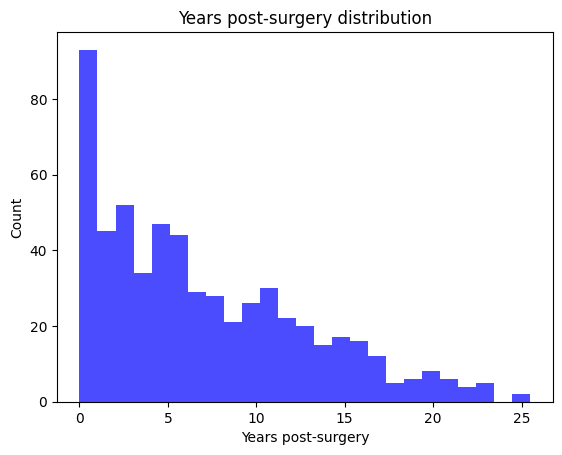

In [19]:
# Create a histogram
plt.hist(consolidated_df["eo_yrs_postsurg"], bins=25, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Years post-surgery')
plt.ylabel('Count')
plt.title('Years post-surgery distribution')

# Show the plot
plt.show()

## Distribution of the number of surgeries

In [20]:
import pandas as pd

# Read dataframe
wide_df = pd.read_csv("../../data/processed/preprocessed_df.csv")

C:\Users\amaur\AppData\Local\Temp\ipykernel_27688\3973735160.py:4: DtypeWarning: Columns (80,122,145,312,316,320,324,380,458,507,518,519,520,521,522,523,524,561,567,583,584,585,586,587,596,597,599,600,603,615,616,617,622,628,631,632,634,641,677,690,693,707,709,713,715,716,718,720,721,723,727,728,730,743,745,752,754,756,757,759,763,765,767,769,771,786,805,807,808,809,810,812,813,882,883,891,900,963,970,971,979,988,1051,1058,1059,1067,1075,1076,1139,1146,1164,1227,1235,1252,1322,1323,1340,1411,1428,1518,1535,1553,1673,1725,1733,1785,1796,1814,1825,1877,1885,1948,1949,1958,1977,2029,2037,2089,2129,2181,2189,2241,2252,2253,2262,2281,2333,2341,2393,2405,2414,2422,2433,2485,2493,2545,2557,2585,2637,2645,2697,2726,2737,2789,2797,2849,2861,2878,2880,2881,2894,2898,2907,2912,2924,2946,2972,2973,3111,3123,3171,3239,3300,3473,3474,3483,3487,3490,3583,3584,3623,3635,3639,3647,3836,3839,3851,3855,3857,3858,3862,3867,3872,3881,3882,3965,3967,3972,3973,3976,3977,3978,3981,3990,3991,3992,3993,3994,399

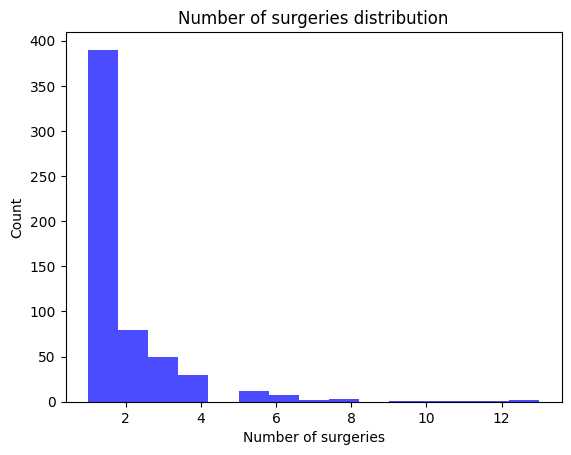

In [21]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(wide_df["surgical_information"], bins=15, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Number of surgeries')
plt.ylabel('Count')
plt.title('Number of surgeries distribution')

# Show the plot
plt.show()

In [22]:
def create_surg_group(nbr_surg):
    if nbr_surg == 1:
        return "Group 1"
    elif nbr_surg == 2:
        return "Group 2"
    else:
        return "Group 3"
    
def create_post_surg_group(nbr_year):
    if nbr_year < 2:
        return "Group 1"
    elif nbr_year < 4:
        return "Group 2"
    else:
        return "Group 3"

wide_df["surgical_group"] = wide_df["surgical_information"].apply(create_surg_group)
wide_df["time_group"] = wide_df["eo_yrs_postsurg"].apply(create_post_surg_group)
#wide_df = wide_df[wide_df["eo_yrs_postsurg"]<5]

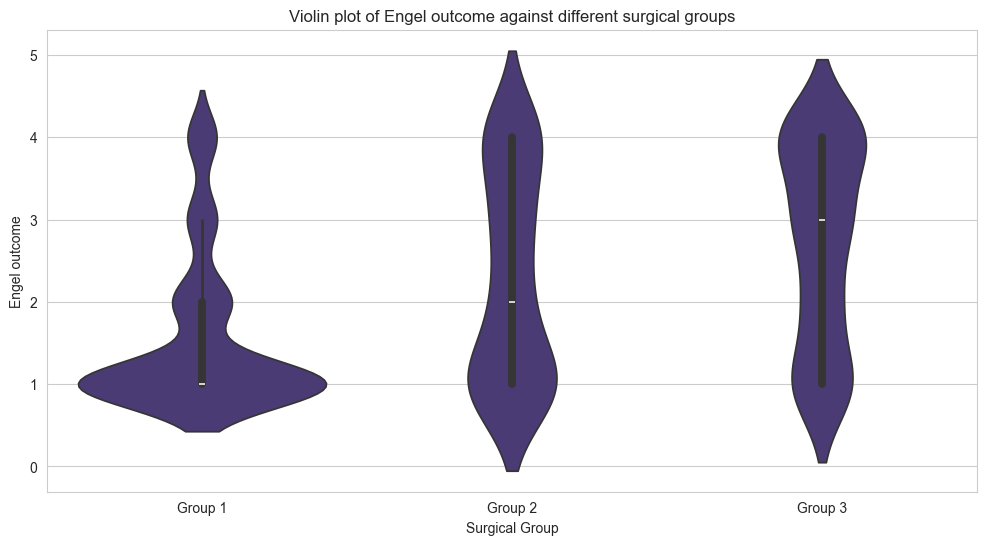

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the desired order
group_order = ['Group 1', 'Group 2', 'Group 3']

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))  # You can adjust the size of the plot
plot = sns.violinplot(x='surgical_group', y='surg_engel', order=group_order, data=wide_df)
#plot = sns.countplot(x='surgical_group', hue='surg_engel', order=group_order, data=wide_df)

# Set titles and labels (optional)
plt.title('Violin plot of Engel outcome against different surgical groups')
plt.xlabel('Surgical Group')
plt.ylabel('Engel outcome')

# Display the plot
plt.show()

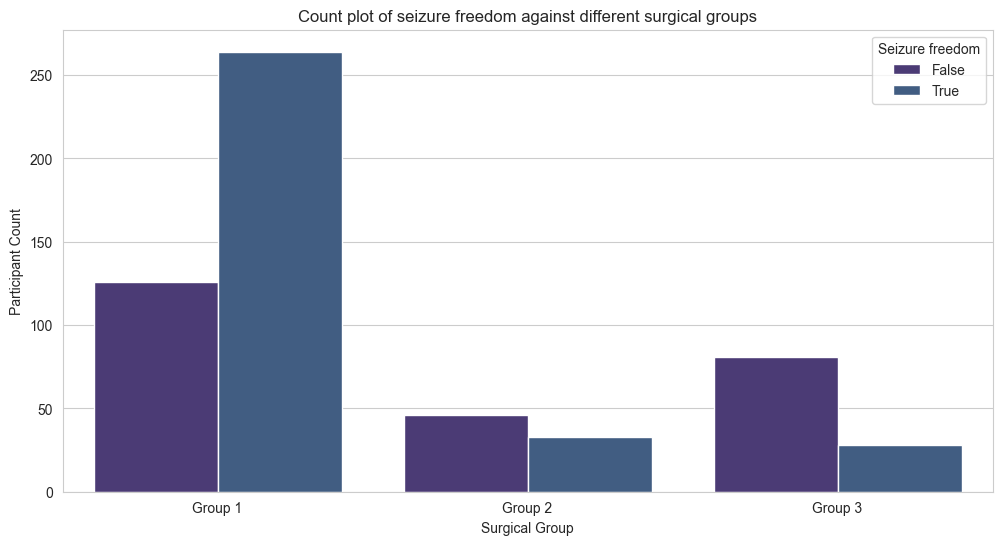

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

wide_df["surg_engel_binary"] = wide_df["surg_engel"]==1

# Define the desired order
group_order = ['Group 1', 'Group 2', 'Group 3']

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))  # You can adjust the size of the plot
plot = sns.countplot(x='surgical_group', hue='surg_engel_binary', order=group_order, data=wide_df)

# Set titles and labels (optional)
plt.title('Count plot of seizure freedom against different surgical groups')
plt.xlabel('Surgical Group')
plt.ylabel('Participant Count')

# Customize legend
handles, labels = plot.get_legend_handles_labels()
plt.legend(handles, ['False', 'True'], title='Seizure freedom', loc='upper right')

# Display the plot
plt.show()

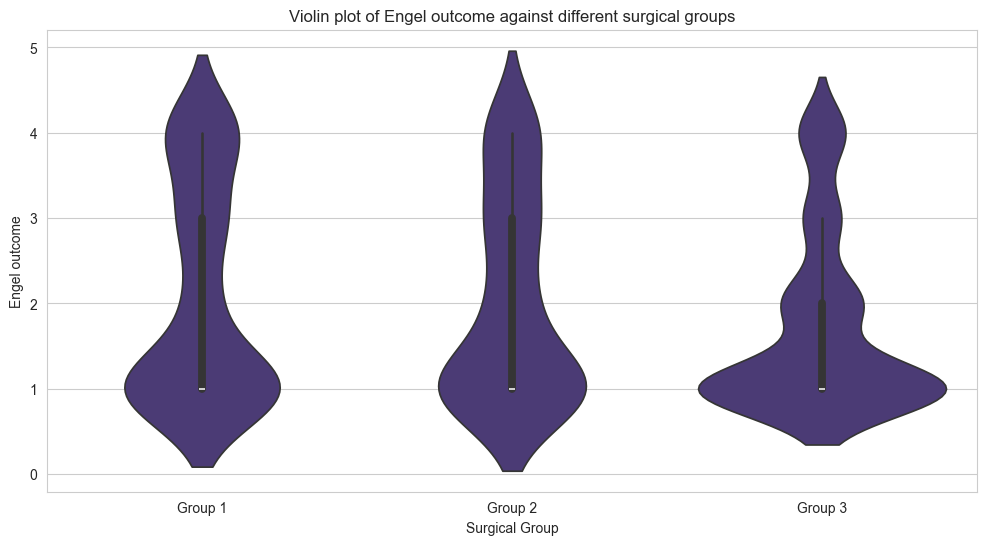

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the desired order
group_order = ['Group 1', 'Group 2', 'Group 3']

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))  # You can adjust the size of the plot
plot = sns.violinplot(x='time_group', y='surg_engel', order=group_order, data=wide_df)
#plot = sns.countplot(x='surgical_group', hue='surg_engel', order=group_order, data=wide_df)

# Set titles and labels (optional)
plt.title('Violin plot of Engel outcome against different surgical groups')
plt.xlabel('Surgical Group')
plt.ylabel('Engel outcome')

# Display the plot
plt.show()

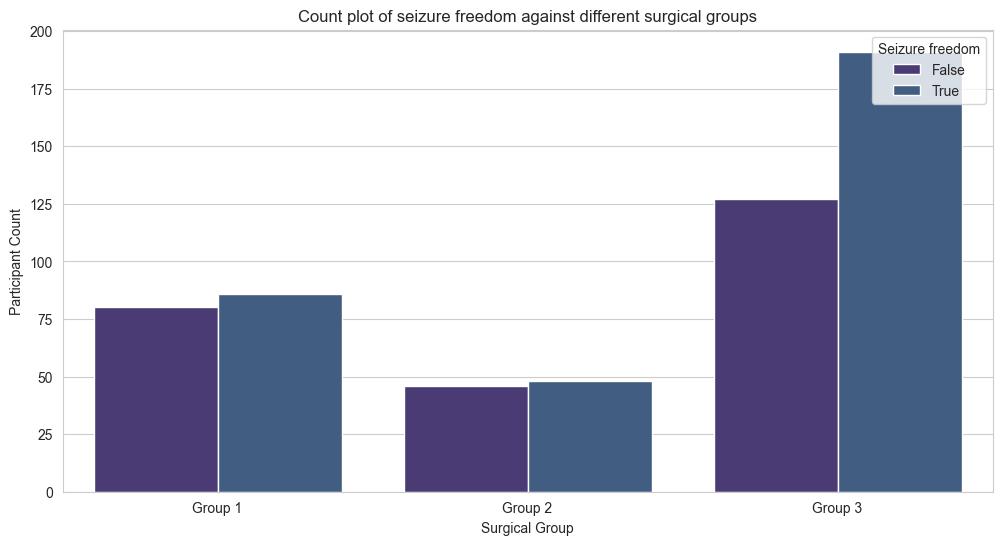

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

wide_df["surg_engel_binary"] = wide_df["surg_engel"]==1

# Define the desired order
group_order = ['Group 1', 'Group 2', 'Group 3']

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))  # You can adjust the size of the plot
plot = sns.countplot(x='time_group', hue='surg_engel_binary', order=group_order, data=wide_df)

# Set titles and labels (optional)
plt.title('Count plot of seizure freedom against different surgical groups')
plt.xlabel('Surgical Group')
plt.ylabel('Participant Count')

# Customize legend
handles, labels = plot.get_legend_handles_labels()
plt.legend(handles, ['False', 'True'], title='Seizure freedom', loc='upper right')

# Display the plot
plt.show()

In [27]:
import pandas as pd

# Read dataframe from the pickle format
wide_df = pd.read_csv("../../data/processed/preprocessed_ctd_pre.csv")

C:\Users\amaur\AppData\Local\Temp\ipykernel_27688\2897815225.py:4: DtypeWarning: Columns (80,122,145,312,316,320,324,380,458,507,518,519,520,521,522,523,524,561,567,583,584,585,586,587,596,597,599,600,603,615,616,617,622,628,631,632,634,641,677,690,693,707,709,713,715,716,718,720,721,723,727,728,730,743,745,752,754,756,757,759,763,765,767,769,771,786,805,807,808,809,810,812,813,882,883,891,900,963,970,971,979,988,1051,1058,1059,1067,1075,1076,1139,1146,1164,1227,1235,1252,1322,1323,1340,1411,1428,1518,1535,1553,1673,1725,1733,1785,1796,1814,1825,1877,1885,1948,1949,1958,1977,2029,2037,2089,2129,2181,2189,2241,2252,2253,2262,2281,2333,2341,2393,2405,2414,2422,2433,2485,2493,2545,2557,2585,2637,2645,2697,2726,2737,2789,2797,2849,2861,2878,2880,2881,2894,2898,2907,2912,2924,2946,2972,2973,3111,3123,3171,3239,3300,3473,3474,3483,3487,3490,3583,3584,3623,3635,3639,3647,3836,3839,3851,3855,3857,3858,3862,3867,3872,3881,3882,3965,3967,3972,3973,3976,3977,3978,3981,3990,3991,3992,3993,3994,399

# For Poster

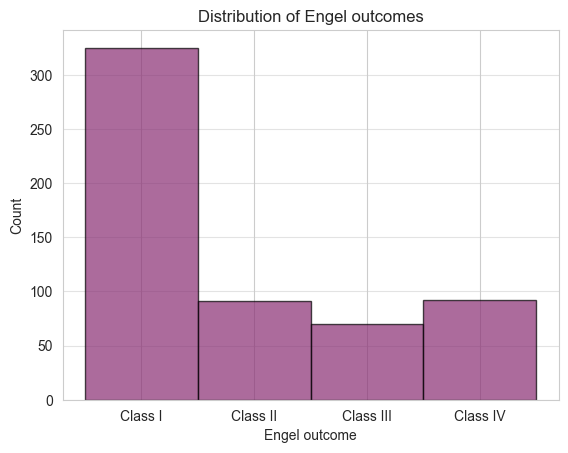

In [28]:
import matplotlib.pyplot as plt

# Continue with your histogram code
# Create a histogram of the 'surg_engel' variable with specified colors and bin edges
plt.hist(wide_df['surg_engel'], bins=[1, 2, 3, 4, 5], color='#892d73', alpha=0.7, edgecolor='black') 

# Customize x-axis ticks and labels
bin_centers = [1.5, 2.5, 3.5, 4.5]
plt.xticks(bin_centers, ['Class I', 'Class II', 'Class III', 'Class IV'])

# Add labels and title
plt.xlabel('Engel outcome')
plt.ylabel('Count')
plt.title('Distribution of Engel outcomes')

# Add grid for better readability
plt.grid(axis='y', alpha=0.55)

# Show the plot
plt.show()


In [29]:
from scipy import stats
import numpy as np

# Calculate mean
mean_age = wide_df['age'].mean()

# Calculate standard error of the mean (SEM)
sem = stats.sem(wide_df['age'])

# Degrees of freedom
df_degrees = len(wide_df['age']) - 1

# Confidence level
confidence_level = 0.95

# Calculate the confidence interval
ci = stats.t.interval(confidence=confidence_level, df=df_degrees, loc=mean_age, scale=sem)


print(f"Mean age: {mean_age}")
print(f"{confidence_level*100}% Confidence Interval for the mean age: {ci}")


Mean age: 39.66955017301038
95.0% Confidence Interval for the mean age: (38.27245884701172, 41.06664149900904)


In [30]:
from scipy import stats
import numpy as np

wide_df['eo_years_postsurg'] = wide_df['eo_days_postsurg']/365.25

# Exclude missing values
clean_data = wide_df['eo_years_postsurg'].dropna()

# Calculate mean
mean_yps = clean_data.mean()

# Calculate standard error of the mean (SEM)
sem = stats.sem(clean_data)

# Degrees of freedom
df_degrees = len(clean_data) - 1

# Confidence level
confidence_level = 0.95

# Calculate the confidence interval
ci = stats.t.interval(confidence=confidence_level, df=df_degrees, loc=mean_yps, scale=sem)


print(f"Mean years post-surgery: {mean_yps}")
print(f"{confidence_level*100}% Confidence Interval for the mean years post-surgery: {ci}")


Mean years post-surgery: 6.184695793697961
95.0% Confidence Interval for the mean years post-surgery: (5.713358015152549, 6.656033572243373)


# For Paper

## Description table

### Import the data

In [31]:
import pandas as pd

# Read dataframe
wide_df = pd.read_csv("../../data/processed/preprocessed_ctd_pre.csv")

# Filter
wide_df = wide_df[wide_df["eo_days_postsurg"]<(365.25*5)]

# Select the handwritten columns as final columns (manually checked and annotated)
wide_df = wide_df.drop(columns=["age_of_onset", "freq_per_month"])
wide_df = wide_df.rename(columns={"age_of_onset_hw": "age_of_onset",
                      "freq_per_month_hw": "freq_per_month"})

# Turn the outcome variable binary
wide_df["surg_engel"] = wide_df["surg_engel"] == 1

# Read the column names
with open('../../data/processed/column_names.txt', 'r') as file:
    column_names = [line.strip() for line in file.readlines()]

C:\Users\amaur\AppData\Local\Temp\ipykernel_27688\767651975.py:4: DtypeWarning: Columns (80,122,145,312,316,320,324,380,458,507,518,519,520,521,522,523,524,561,567,583,584,585,586,587,596,597,599,600,603,615,616,617,622,628,631,632,634,641,677,690,693,707,709,713,715,716,718,720,721,723,727,728,730,743,745,752,754,756,757,759,763,765,767,769,771,786,805,807,808,809,810,812,813,882,883,891,900,963,970,971,979,988,1051,1058,1059,1067,1075,1076,1139,1146,1164,1227,1235,1252,1322,1323,1340,1411,1428,1518,1535,1553,1673,1725,1733,1785,1796,1814,1825,1877,1885,1948,1949,1958,1977,2029,2037,2089,2129,2181,2189,2241,2252,2253,2262,2281,2333,2341,2393,2405,2414,2422,2433,2485,2493,2545,2557,2585,2637,2645,2697,2726,2737,2789,2797,2849,2861,2878,2880,2881,2894,2898,2907,2912,2924,2946,2972,2973,3111,3123,3171,3239,3300,3473,3474,3483,3487,3490,3583,3584,3623,3635,3639,3647,3836,3839,3851,3855,3857,3858,3862,3867,3872,3881,3882,3965,3967,3972,3973,3976,3977,3978,3981,3990,3991,3992,3993,3994,3995

In [32]:
# One-Hot Encoding for the first four columns
one_hot_encoded_df = pd.get_dummies(wide_df, columns=["epi_seiz_se", "seiz_onset_lat"])

# Convert textual categorical variable to category type
wide_df['epi_icd'] = wide_df['epi_icd'].astype('category')

# One-Hot Encoding for 'epi_icd'
wide_df = one_hot_encoded_df.join(pd.get_dummies(wide_df['epi_icd'], prefix='epi_icd'))

#wide_df = wide_df.drop("epi_icd", axis=1)

del one_hot_encoded_df

In [33]:
# Select only needed columns
df = wide_df[column_names+["surg_engel"]]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 1 to 576
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   resect_procedure___2                  302 non-null    float64
 1   date_diff_neuropsychological_testing  229 non-null    float64
 2   surgical_information                  302 non-null    float64
 3   neuro_findings                        289 non-null    float64
 4   resect_procedure___4                  302 non-null    float64
 5   seizure_notes_word_cnt                277 non-null    float64
 6   age_of_onset                          218 non-null    float64
 7   freq_per_month                        290 non-null    float64
 8   neuropsychological_testing            302 non-null    float64
 9   resect_procedure___15                 302 non-null    float64
 10  age                                   302 non-null    float64
 11  phys_findings           

In [36]:
wide_df["epi_icd"].replace(", ", ".").unique()

array(['G40.219', 'G40.909', 'G40.209', 'G40.119', 'G40.211', 'G40.911',
       'G40, 109', 'G40.019', 'G40.109', 'G40.111', '345.41', 'G40.219 ',
       'G40.919', 'G40.109 ', 'G40, 019', 'G40.909 ', 'Not reported',
       'G40.814', 'G40.209 ', 'R56.9', '345.9', 'G40.419', '345.91',
       'G40.001', 'G40.219, G40.109 ', 'G40.009 ', 'G40.309', 'G40.201',
       '345.51', 'G40.119 ', nan], dtype=object)

C:\Users\amaur\AppData\Local\Temp\ipykernel_27688\2777754311.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts, x='count', y='epi_icd', palette='viridis')


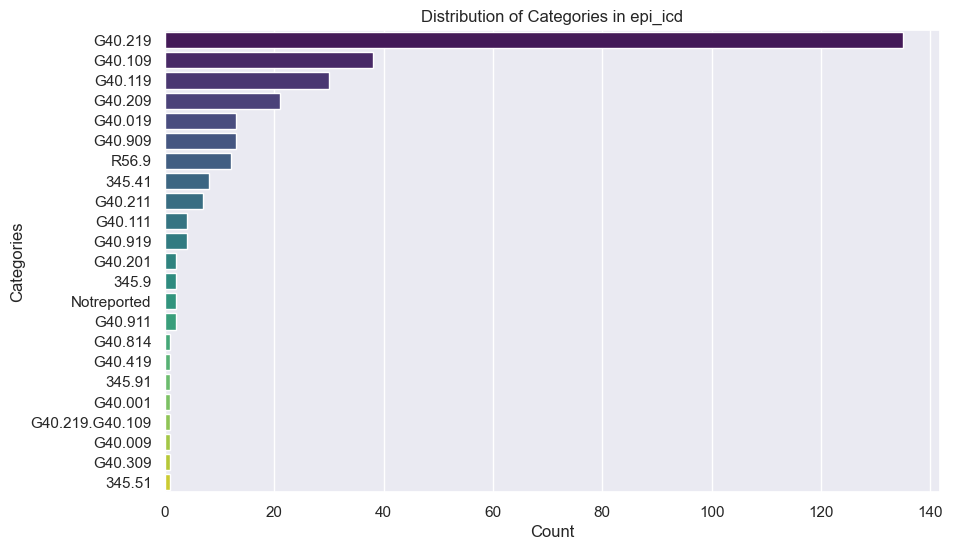

In [37]:
from os import replace
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that seaborn's aesthetic settings are set
sns.set_theme()

wide_df["epi_icd"] = wide_df["epi_icd"].str.replace(" ", "").str.replace(",", ".")

# Count the occurrences of each category
category_counts = wide_df["epi_icd"].value_counts().reset_index()
category_counts.columns = ['epi_icd', 'count']

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the size as needed
sns.barplot(data=category_counts, x='count', y='epi_icd', palette='viridis')

plt.title('Distribution of Categories in epi_icd')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.show()

In [38]:
print("Number of patients with ICD G40.219 (complex intractable): " +
      str(wide_df[wide_df["epi_icd"]=="G40.219"]["surg_engel"].sum()) +
      "\nPercentage of seizure freedom: " +
      str(wide_df[wide_df["epi_icd"]=="G40.219"]["surg_engel"].sum()/len(wide_df[wide_df["epi_icd"]=="G40.219"].index))[:4])

Number of patients with ICD G40.219 (complex intractable): 61
Percentage of seizure freedom: 0.45


In [39]:
print("Number of patients with ICD G40.109 (simple tractable): " +
      str(wide_df[wide_df["epi_icd"]=="G40.109"]["surg_engel"].sum()) +
      "\nPercentage of seizure freedom: " +
      str(wide_df[wide_df["epi_icd"]=="G40.109"]["surg_engel"].sum()/len(wide_df[wide_df["epi_icd"]=="G40.109"].index))[:4])

Number of patients with ICD G40.109 (simple tractable): 23
Percentage of seizure freedom: 0.60


In [40]:
print("Number of patients with ICD G40.209 (simple intractable): " +
      str(wide_df[wide_df["epi_icd"]=="G40.209"]["surg_engel"].sum()) +
      "\nPercentage of seizure freedom: " +
      str(wide_df[wide_df["epi_icd"]=="G40.209"]["surg_engel"].sum()/len(wide_df[wide_df["epi_icd"]=="G40.209"].index))[:4])

Number of patients with ICD G40.209 (simple intractable): 16
Percentage of seizure freedom: 0.76


In [41]:
wide_df[wide_df["epi_icd"]=="G40.109"][["resect_procedure___1", "resect_procedure___2", "resect_procedure___3",
             "resect_procedure___4", "resect_procedure___5", "resect_procedure___6", "resect_procedure___7",
             "resect_procedure___8", "resect_procedure___9", "resect_procedure___10", "resect_procedure___14", "resect_procedure___15"]]

,resect_procedure___1,resect_procedure___2,resect_procedure___3,resect_procedure___4,resect_procedure___5,resect_procedure___6,resect_procedure___7,resect_procedure___8,resect_procedure___9,resect_procedure___10,resect_procedure___14,resect_procedure___15
21,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
BA_df = pd.read_csv("../../data/processed/BA.csv")

wide_df = pd.merge(wide_df, BA_df, on="record_id", how="left")
wide_df["presurg_scan_age"] = wide_df["presurg_scan_year"] - wide_df["dem_yob"]
#wide_df["BA_pred"] = wide_df["BA_pred"] - wide_df["presurg_scan_age"]

### Density plot/Histogram of all participants

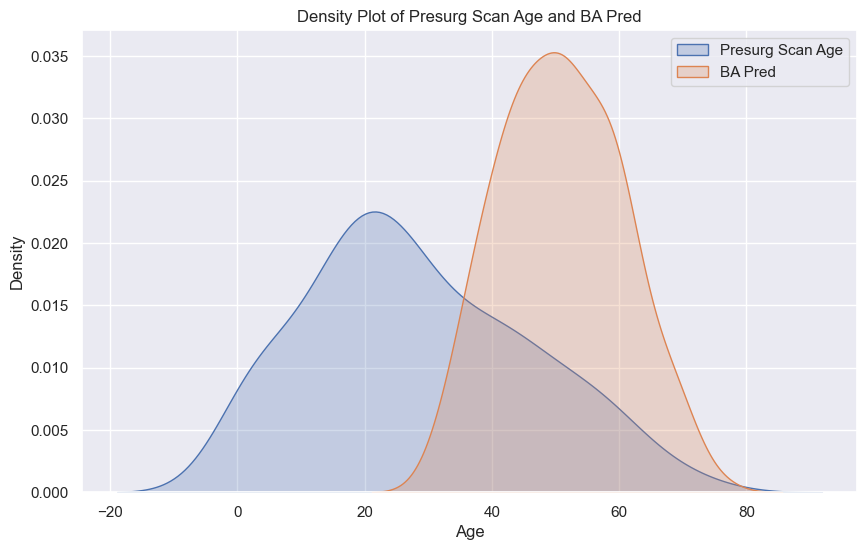

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming wide_df is your dataframe
plt.figure(figsize=(10, 6))

# Plotting density for "presurg_scan_age"
sns.kdeplot(wide_df['presurg_scan_age'], label='Presurg Scan Age', fill=True)

# Plotting density for "BA_pred"
sns.kdeplot(wide_df['BA_pred'], label='BA Pred', fill=True)

# Adding title and labels
plt.title('Density Plot of Presurg Scan Age and BA Pred')
plt.xlabel('Age')
plt.ylabel('Density')

# Adding legend
plt.legend()

# Display the plot
plt.show()

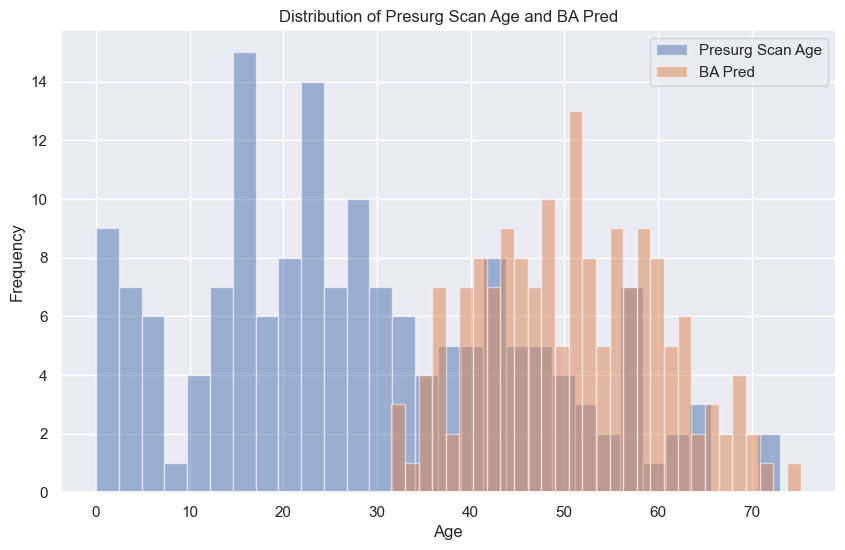

In [47]:
import matplotlib.pyplot as plt

# Assuming wide_df is your dataframe
plt.figure(figsize=(10, 6))

# Plotting histogram for "presurg_scan_age"
plt.hist(wide_df['presurg_scan_age'], bins=30, alpha=0.5, label='Presurg Scan Age')

# Plotting histogram for "BA_pred"
plt.hist(wide_df['BA_pred'], bins=30, alpha=0.5, label='BA Pred')

# Adding title and labels
plt.title('Distribution of Presurg Scan Age and BA Pred')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Adding legend
plt.legend()

# Display the plot
plt.show()


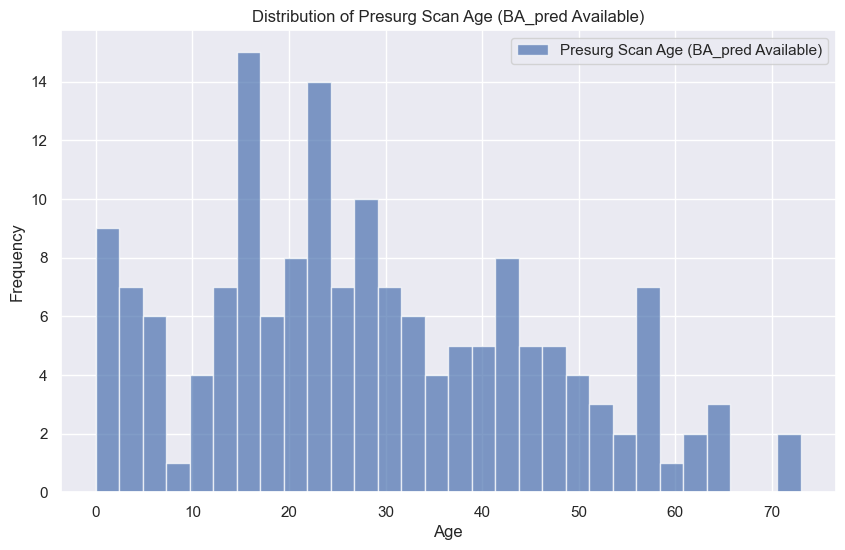

In [48]:
import matplotlib.pyplot as plt

# Subset the dataframe where "BA_pred" is not NA
subset_df = wide_df.dropna(subset=['BA_pred'])

plt.figure(figsize=(10, 6))

# Plotting histogram for "presurg_scan_age" in the subset
plt.hist(subset_df['presurg_scan_age'], bins=30, alpha=0.7, label='Presurg Scan Age (BA_pred Available)')

# Adding title and labels
plt.title('Distribution of Presurg Scan Age (BA_pred Available)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [50]:
# Subset the dataframe where "BA_pred" is not NA
subset_df = wide_df.dropna(subset=['BA_pred'])

# Count the number of rows where "presurg_scan_age" is below 21
below_21_count = subset_df[subset_df['presurg_scan_age'] < 21].shape[0]

# Count the number of rows where "presurg_scan_age" is 21 or above
above_or_equal_21_count = subset_df[subset_df['presurg_scan_age'] >= 21].shape[0]

print("Below 21 yo:", below_21_count)
print("Above or eq to 21 yo:", above_or_equal_21_count)

Below 21 yo: 59
Above or eq to 21 yo: 104


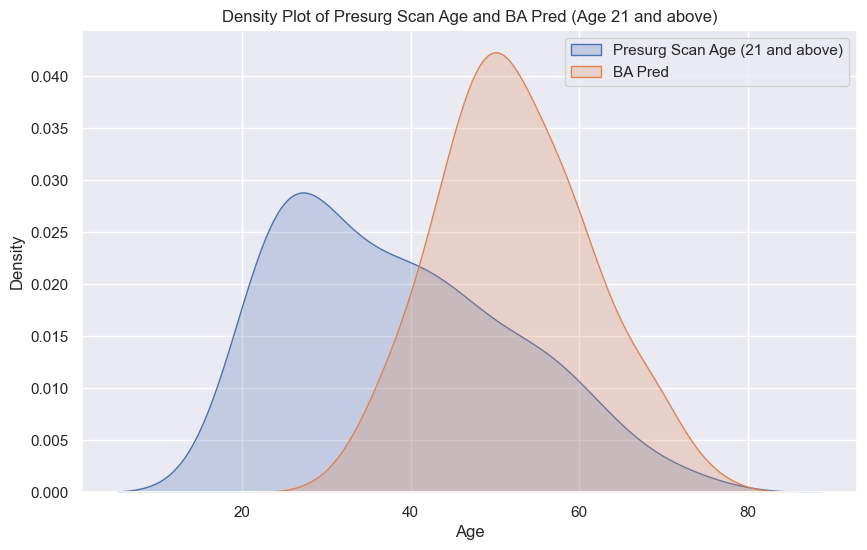

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset the dataframe where "BA_pred" is not NA and "presurg_scan_age" is 21 or above
filtered_df = wide_df.dropna(subset=['BA_pred'])
filtered_df = filtered_df[filtered_df['presurg_scan_age'] >= 21]

plt.figure(figsize=(10, 6))

# Plotting density for "presurg_scan_age"
sns.kdeplot(filtered_df['presurg_scan_age'], label='Presurg Scan Age (21 and above)', fill=True)

# Plotting density for "BA_pred"
sns.kdeplot(filtered_df['BA_pred'], label='BA Pred', fill=True)

# Adding title and labels
plt.title('Density Plot of Presurg Scan Age and BA Pred (Age 21 and above)')
plt.xlabel('Age')
plt.ylabel('Density')

# Adding legend
plt.legend()

# Display the plot
plt.show()

## Print system information

In [44]:
import session_info

session_info.show()